<a href="https://colab.research.google.com/github/AlexBYork/MachineLearningExamples/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd

In [5]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv") # Just using some data from google colab
# In general using random data without exploration is a bad idea... This one is just easily available from google colab.
#In this data set lat/long may be a bad thing to try to cluster with the other data, we would definetely waant to explore that more
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [10]:
"""K Means Clustering example
We are going to try a range of k-values from 2 to 10 to see what a reasonable value is.  To start we can simply use the elbow method to get an idea of how many clusters we are going to want.

"""

distortions = []
values_of_k = range(2,10)

for k in values_of_k:
    k_means=KMeans(n_clusters=k, random_state=42)
    k_means.fit(scale(df)) # K_means is scale dependant this scales all of our features
    distortion = k_means.score(scale(df))
    distortions.append(-distortion)
distortions    

[116458.05723075006,
 90059.87486785122,
 77524.31940977101,
 67533.01866600064,
 62298.0899352518,
 57212.80049706133,
 53116.58210669399,
 50086.30176475819]

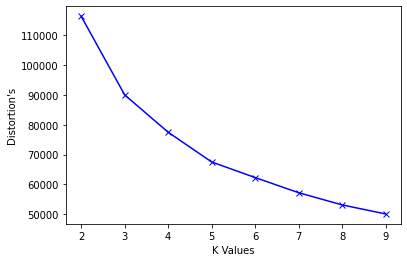

In [9]:
import matplotlib.pyplot as plt

plt.plot(values_of_k, distortions, 'bx-') 
plt.xlabel('K Values') 
plt.ylabel("Distortion's") 
plt.show()